Set-up

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [2]:
os.getcwd()
#working directory should be /Code/CodeFigure6

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure6'

In [3]:
csv_path = "../../Data/DataFigure6/Atg8amChGfpEggsFemale_n.csv"
df = pd.read_csv(csv_path)

In [4]:
df['Group'] = df['Weeks'].astype(str) + 'wk-' + df['Genotype']
df['Group'] = df['Group'].replace({
    '1wk-Control': '1 Week Control',
    '1wk-Exp': '1 Week Exp',
    '6wk-Control': '6 Weeks Control',
    '6wk-Exp': '6 Weeks Exp'
})

order = ['1 Week Control', '1 Week Exp', '6 Weeks Control', '6 Weeks Exp']
df['Group'] = pd.Categorical(df['Group'], categories=order, ordered=True)

In [5]:
df.head(10)

,Weeks,Genotype,EggsFemale,n,N,Group
0,6,Control,2.00,1,1,6 Weeks Control
1,6,Exp,6.50,4,1,6 Weeks Exp
2,6,Control,3.50,3,2,6 Weeks Control
3,6,Exp,8.17,3,2,6 Weeks Exp
4,6,Control,0.50,1,3,6 Weeks Control
5,6,Exp,3.00,1,3,6 Weeks Exp
6,1,Control,7.50,4,1,1 Week Control
7,1,Exp,16.50,4,1,1 Week Exp
8,1,Control,10.50,4,2,1 Week Control
9,1,Exp,26.20,3,2,1 Week Exp


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_50517/1938143327.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_50517/1938143327.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_max = df.groupby("Group")["EggsFemale"].max()
/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_50517/1938143327.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


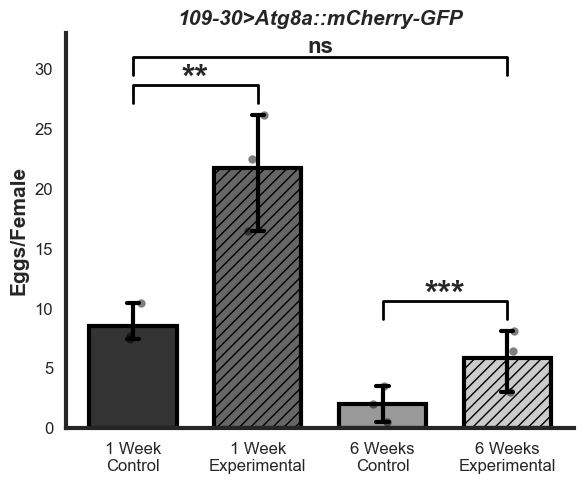

In [7]:
stats_path = "../../Results/ResultsFigure6/StatsEggsPoisson.csv"
stats = pd.read_csv(stats_path)

comparison_to_stars = dict(
    zip(stats["comparison"], stats["stars"])
)


order = [
    "1 Week Control",
    "1 Week Exp",
    "6 Weeks Control",
    "6 Weeks Exp"
]


fig, ax = plt.subplots(figsize=(6, 5))
sns.set(style="white")


sns.barplot(
    data=df,
    x="Group",
    y="EggsFemale",
    order=order,
    palette="gray",
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

exp_indices = [1, 3]
for i, patch in enumerate(ax.patches):
    if i in exp_indices:
        patch.set_hatch("///")
        patch.set_edgecolor("black")
        patch.set_linewidth(3)

sns.stripplot(
    data=df,
    x="Group",
    y="EggsFemale",
    order=order,
    color="black",
    alpha=0.5,
    size=6,
    jitter=True,
    ax=ax
)

y_max = df.groupby("Group")["EggsFemale"].max()

def add_stat_bracket(ax, g1, g2, star, offset, height=1.5):
    x1 = order.index(g1)
    x2 = order.index(g2)

    y = max(y_max[g1], y_max[g2]) + offset

    ax.plot(
        [x1, x1, x2, x2],
        [y, y + height, y + height, y],
        lw=2,
        c="black"
    )

    ax.text(
        (x1 + x2) / 2,
        y + height + (-1 if star != "ns" else 0.02),
        star,
        ha="center",
        va="bottom",
        fontsize=25 if star != "ns" else 16,
        fontweight="black"
    )


add_stat_bracket(
    ax,
    "1 Week Control",
    "1 Week Exp",
    comparison_to_stars["1wk_Control_vs_Exp"],
    offset=1
)

add_stat_bracket(
    ax,
    "6 Weeks Control",
    "6 Weeks Exp",
    comparison_to_stars["6wk_Control_vs_Exp"],
    offset=1
)

add_stat_bracket(
    ax,
    "1 Week Control",
    "6 Weeks Exp",
    comparison_to_stars["1wk_Control_vs_6wk_Exp"],
    offset=19
)


ax.set_ylim(0, 33)
ax.set_ylabel("Eggs/Female", fontsize=15, weight="bold")
ax.set_xlabel("")
ax.tick_params(width=3, labelsize=12)

ax.set_xticklabels([
    "1 Week\nControl",
    "1 Week\nExperimental",
    "6 Weeks\nControl",
    "6 Weeks\nExperimental"
])

ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title('109-30>Atg8a::mCherry-GFP', fontsize=15, weight='bold', style='italic')

plt.tight_layout()

results_directory = "../../Results/ResultsFigure6"
os.makedirs(results_directory, exist_ok=True)
filename = os.path.join(results_directory, "EggLayingAtg8a.pdf")
plt.savefig(filename, format="pdf", bbox_inches="tight")
plt.show()

In [5]:
summary = (
    df.groupby("Group")["EggsFemale"]
      .agg(mean="mean", std="std")
      .reset_index()
)

print(summary)

             Group       mean       std
0   1 Week Control   8.583333  1.664582
1       1 Week Exp  21.733333  4.895236
2  6 Weeks Control   2.000000  1.500000
3      6 Weeks Exp   5.890000  2.638428


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_95173/3817278549.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Group")["EggsFemale"]
